# Ideas for EDA Testing/Analysis

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [31]:
main_df = pd.read_pickle('main_df.pkl')

display(main_df.head())
display(main_df.info())

,congress,chamber,rollnumber,icpsr,cast_code,state_abbrev,bioname,bioguide_id,born,nominate_dim1,...,first_year_elected,election_year,tenure,age,is_sponsor,sponsor_party_is_lead,cosponsor_party_D_%,cosponsor_party_R_%,percent_cosponsors_lead_party,sponsor_is_same_party
5,113,Senate,1,14009,1,MS,"COCHRAN, William Thad",C000567,1937,0.287,...,1978,0,35,76,0,1,0.5,0.5,0.5,0
12,113,Senate,1,14203,1,MT,"BAUCUS, Max Sieben",B000243,1941,-0.212,...,1978,0,35,72,0,1,0.5,0.5,0.5,1
18,113,Senate,1,14226,1,IA,"GRASSLEY, Charles Ernest",G000386,1933,0.346,...,1980,0,33,80,0,1,0.5,0.5,0.5,0
24,113,Senate,1,14230,1,IA,"HARKIN, Thomas Richard (Tom)",H000206,1939,-0.351,...,1984,0,29,74,0,1,0.5,0.5,0.5,1
30,113,Senate,1,14307,1,VT,"LEAHY, Patrick Joseph",L000174,1940,-0.361,...,1980,0,33,73,0,1,0.5,0.5,0.5,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110268 entries, 5 to 306260
Data columns (total 67 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   congress                       110268 non-null  int64  
 1   chamber                        110268 non-null  object 
 2   rollnumber                     110268 non-null  int64  
 3   icpsr                          110268 non-null  int64  
 4   cast_code                      110268 non-null  int64  
 5   state_abbrev                   110268 non-null  object 
 6   bioname                        110268 non-null  object 
 7   bioguide_id                    110268 non-null  object 
 8   born                           110268 non-null  int64  
 9   nominate_dim1                  110268 non-null  float64
 10  nominate_dim2                  110268 non-null  float64
 11  party                          110268 non-null  object 
 12  last_name                     

None

Election year to party line vote

count of bill subjects (will need to shorten)

In [16]:
subjects = []
for i in range(20):
    temp_sub = main_df['subject_{}'.format(i)].unique()
    subjects += list(temp_sub)
    
subjects = [x for x in subjects if pd.notna(x)]   

(17, 'Appropriations')
(16, 'Research and development')
(16, 'Government trust funds')
(15, 'Russia')
(15, 'Executive agency funding and structure')
(15, 'Economic development')
(15, 'Department of Defense')
(14, "Women's health")
(14, "Veterans' medical care")
(14, 'Israel')


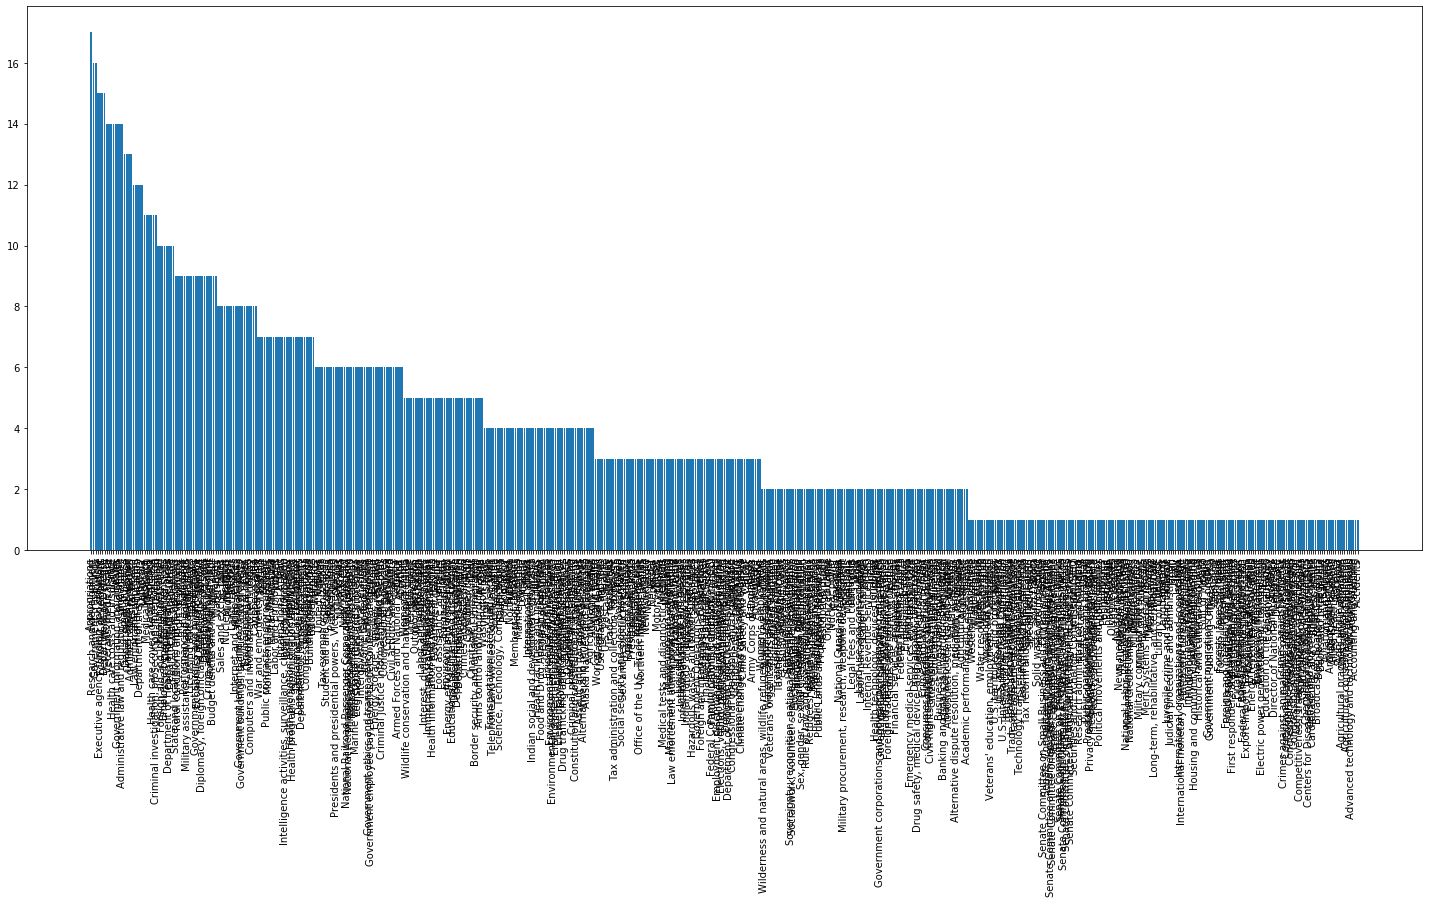

In [15]:
count_subject = []
for i in sorted(set(subjects)):
    count = subjects.count(i)
    if count > 0:
        count_subject.append((count, i))

x = [x[1] for x in sorted(count_subject, reverse=True)]
y = [x[0] for x in sorted(count_subject, reverse=True)]

for i in range(10):
    print(sorted(count_subject, reverse=True)[i])

plt.figure(figsize=(25,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [81]:
senators_by_cong = main_df.drop_duplicates(subset=['congress', 'bioguide_id'], keep='last')
senators_by_cong

,congress,chamber,rollnumber,icpsr,cast_code,state_abbrev,bioname,bioguide_id,born,nominate_dim1,...,first_year_elected,election_year,tenure,age,is_sponsor,sponsor_party_is_lead,cosponsor_party_D_%,cosponsor_party_R_%,percent_cosponsors_lead_party,sponsor_is_same_party
2795,113,Senate,11,14920,9,MA,"KERRY, John Forbes",K000148,1943,-0.352,...,1984,0,29,70,0,0,0.000,1.000,0.000,0
33785,113,Senate,139,14914,9,NJ,"LAUTENBERG, Frank Raleigh",L000123,1924,-0.382,...,1982,0,31,89,0,1,0.000,0.000,0.000,1
57790,113,Senate,315,14203,1,MT,"BAUCUS, Max Sieben",B000243,1941,-0.212,...,1978,1,36,73,0,1,0.929,0.036,0.929,1
84664,113,Senate,655,14009,9,MS,"COCHRAN, William Thad",C000567,1937,0.287,...,1978,1,36,77,0,0,0.000,0.000,0.000,1
84671,113,Senate,655,14226,1,IA,"GRASSLEY, Charles Ernest",G000386,1933,0.346,...,1980,0,34,81,0,0,0.000,0.000,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306241,116,Senate,508,49300,1,CA,"FEINSTEIN, Dianne",F000062,1933,-0.268,...,1992,0,28,87,0,0,0.545,0.455,0.455,1
306246,116,Senate,508,49308,1,WA,"MURRAY, Patty",M001111,1950,-0.350,...,1992,0,28,70,0,0,0.545,0.455,0.455,1
306250,116,Senate,508,49703,1,ME,"COLLINS, Susan Margaret",C001035,1952,0.112,...,1996,1,24,68,0,0,0.545,0.455,0.455,0
306254,116,Senate,508,49706,1,WY,"ENZI, Michael B.",E000285,1944,0.544,...,1996,1,24,76,0,0,0.545,0.455,0.455,0


count of industries

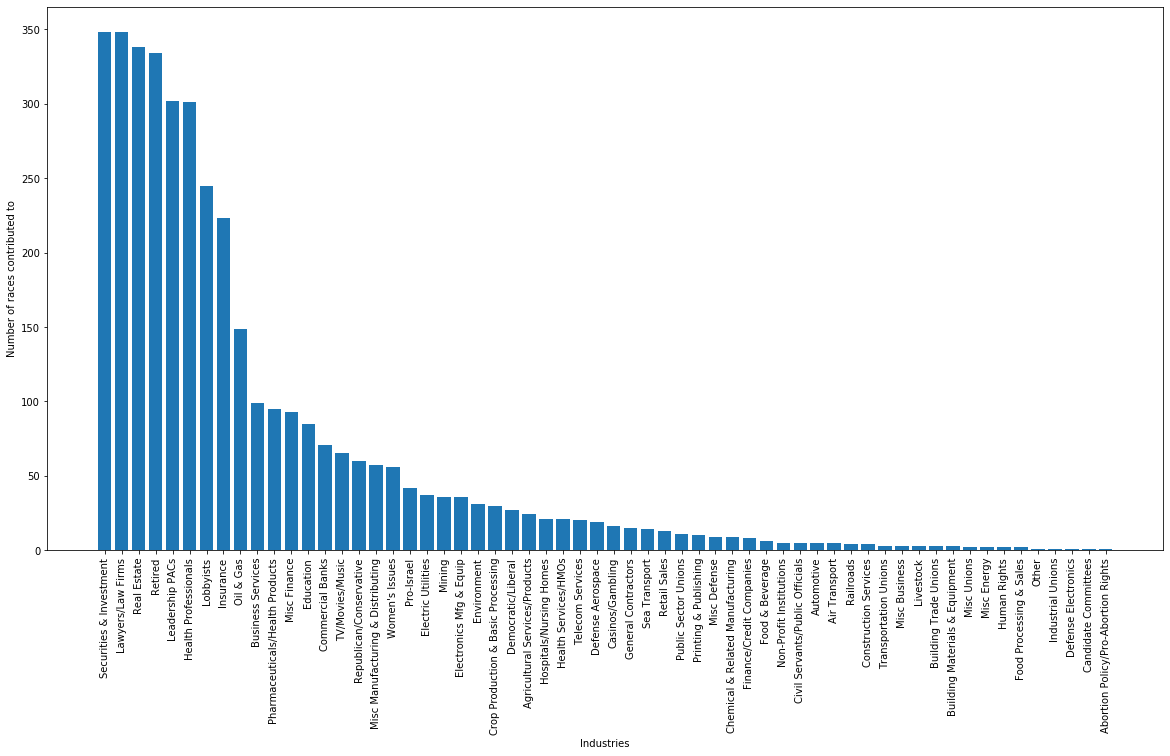

In [82]:
industry_count = {}
for i in range(10):
    industries = senators_by_cong['Industry_{}'.format(i)].values
    for j in industries:
        try:
            industry_count[j] += 1
        except:
            industry_count.update({j: 1})
            
industry_count

sort_industry = sorted(list(zip(industry_count.values(), industry_count.keys())), reverse=True)

x = [x[1] for x in sort_industry]
y = [x[0] for x in sort_industry]

plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('Industries')
plt.ylabel('Number of races contributed to')
plt.show()

count of industry contribs

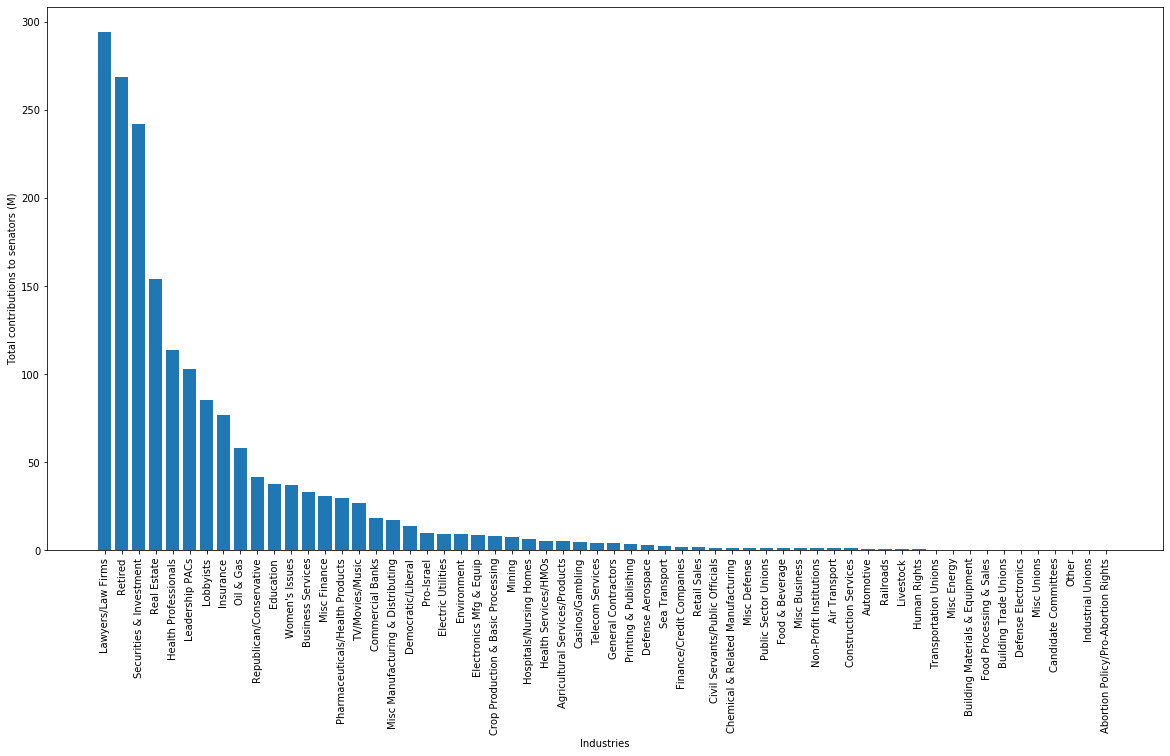

In [83]:
industry_contrib_count = {}
for i in range(10):
    industries = senators_by_cong['Industry_{}'.format(i)].values
    contribs = senators_by_cong['Industry_{}_contrib'.format(i)].values
    for j in range(len(industries)):
        if pd.notna(industries[j]) and pd.notna(contribs[j]):
            try:
                industry_contrib_count[industries[j]] += int(contribs[j])
            except:
                industry_contrib_count.update({industries[j]: int(contribs[j])})
            
short_values = np.fromiter(industry_contrib_count.values(), dtype='int64') / 1000000

sort_industry_contrib = sorted(list(zip(short_values, industry_contrib_count.keys())), reverse=True)

x = [x[1] for x in sort_industry_contrib]
y = [x[0] for x in sort_industry_contrib]

plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('Industries')
plt.ylabel('Total contributions to senators (M)')
plt.show()

count of year seniority levels

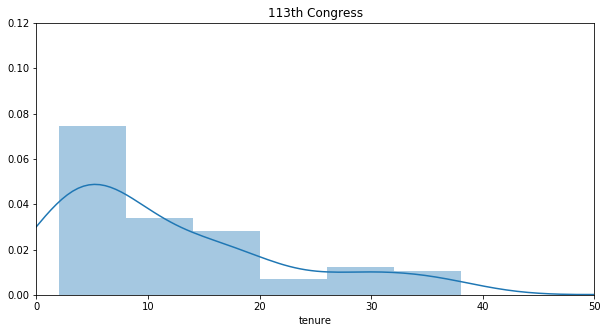

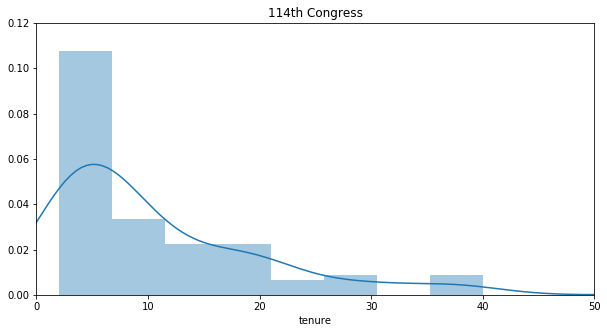

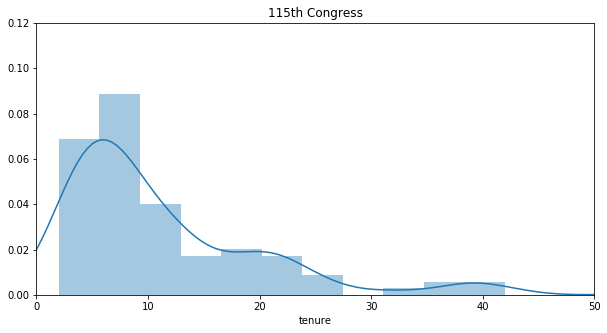

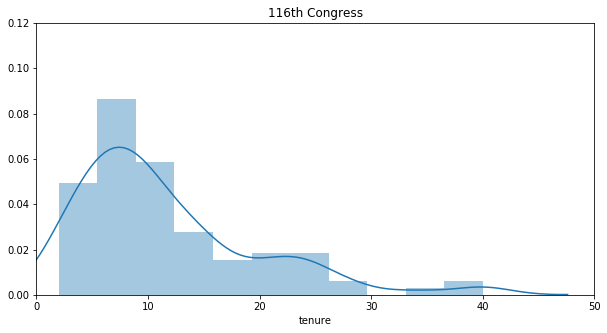

In [84]:
for cong in main_df['congress'].unique():
    senators = main_df[main_df['congress'] == cong].drop_duplicates('cid', keep='last')
    plt.figure(figsize=(10,5))
    plt.ylim(0.0, .12)
    plt.xlim(0.0, 50)
    sns.distplot(senators.tenure)
    plt.title(str(cong) + 'th Congress')

vote margin of election vs. percent vote with party

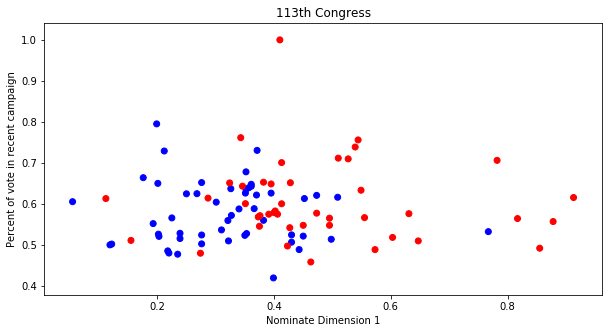

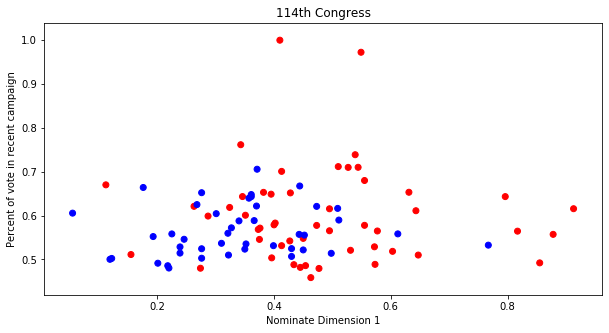

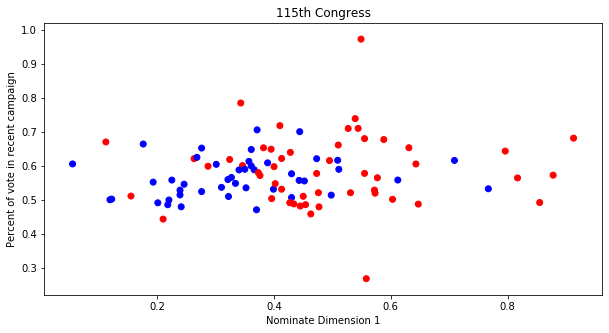

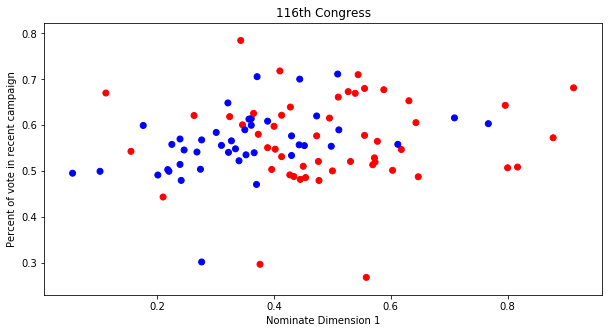

In [99]:
for cong in main_df['congress'].unique():
    x = senators_by_cong[senators_by_cong['congress'] == cong].nominate_dim1.apply(lambda x: abs(x))
    y = senators_by_cong[senators_by_cong['congress'] == cong].percent_campaign_vote
    color = senators_by_cong[senators_by_cong['congress'] == cong].party.apply(lambda x: 'blue' if x=='D' else 'red')
    plt.figure(figsize=(10,5))
    plt.scatter(x,y, c=color)
    plt.xlabel('Nominate Dimension 1')
    plt.ylabel('Percent of vote in recent campaign')
    plt.title(str(cong) + 'th Congress')

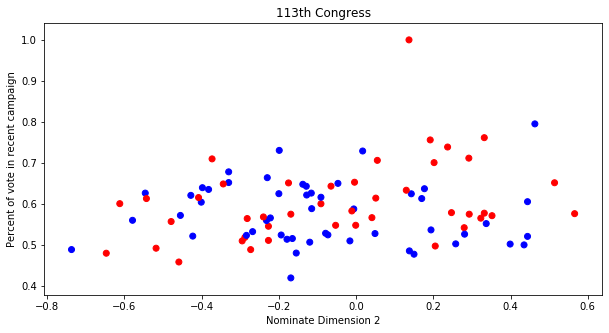

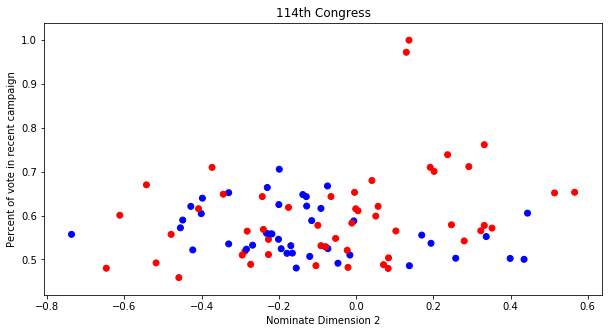

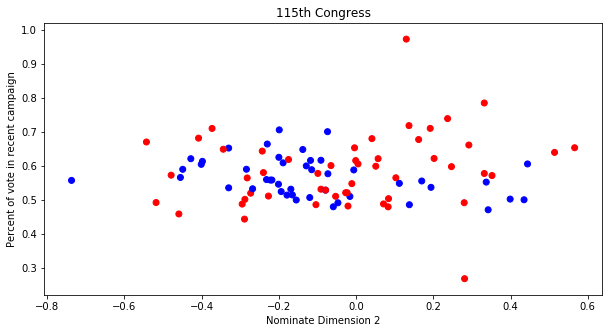

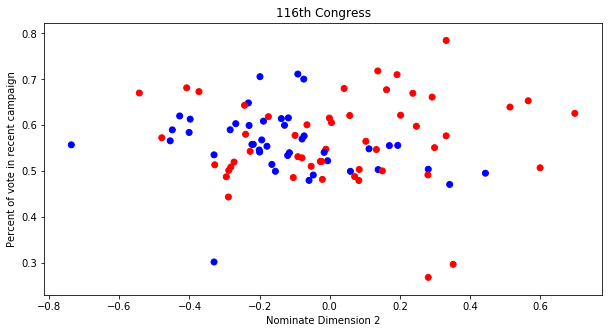

In [97]:
for cong in main_df['congress'].unique():
    x = senators_by_cong[senators_by_cong['congress'] == cong].nominate_dim2
    y = senators_by_cong[senators_by_cong['congress'] == cong].percent_campaign_vote
    color = senators_by_cong[senators_by_cong['congress'] == cong].party.apply(lambda x: 'blue' if x=='D' else 'red')
    plt.figure(figsize=(10,5))
    plt.scatter(x,y, c=color)
    plt.xlabel('Nominate Dimension 2')
    plt.ylabel('Percent of vote in recent campaign')
    plt.title(str(cong) + 'th Congress')

tenure v dw_nominate, color party

distribution of how party line votes are (buckets for degree of partisanship in bill, 0-1, 10 buckets)

how party line is vote v sponsor's party

age to partisanship

age by party

sponsor's age

contribution dollars v age

END

# To investigate later

tenure v leadership position, color by party

committee bill started in to members of that committee who voted for it

committee age to likelihood of passage

average age per committee

count committee bills pass/fail rate

count senator sponsor pass/fail rate

# Working Zone

In [18]:
industries = []
for i in range(10):
    temp_industry = main_df['Industry_{}'.format(i)].unique()
    industries += list(temp_industry)
    
industries = [x for x in industries if pd.notna(x)]    

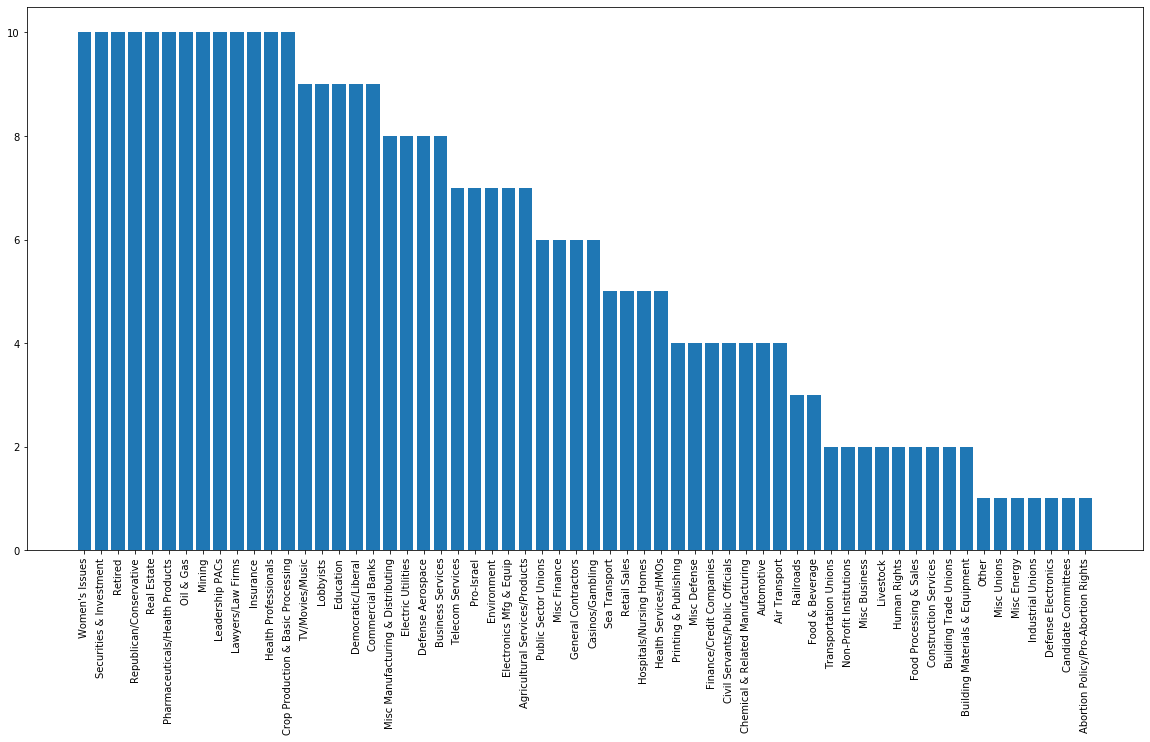

In [19]:
count_industry = []
for i in sorted(set(industries)):
    count_industry.append((industries.count(i), i))
    
sorted(count_industry)

x = [x[1] for x in sorted(count_industry, reverse=True)]
y = [x[0] for x in sorted(count_industry, reverse=True)]

plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()